# **1. Data Cleaning and Preparation**

## 1. Loading Data:


Importing libraries

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


Loading the dataset.
Displaying the first 5 rows of dataset

In [28]:
data = pd.read_csv('weather_classification_data.csv')
data.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


Understanding the data

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


## 2. Handling Missing Values:

Checking if there are null values

In [30]:
data.isnull().sum()

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64

## 3. Data Transformation:

1. Turning categorical variable into numeric variables using One-hot encoding
2. Standerdizing the numeric values (numeric features have a mean of 0 and a SD of 1)

In [31]:
# # Label Encoding (not using)
# for col in data.select_dtypes(include='object').columns:
#     categories, _ = pd.factorize(data[col])
#     data[col] = categories

Before applying transformation, taking out the weather type so that it is being predicted by our classification models using X as features

In [32]:
X = data.drop(columns=['Weather Type'])
y = data['Weather Type']

In [33]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# features
numeric_features = ['Temperature', 'Humidity', 'Wind Speed', 'Precipitation (%)', 'Atmospheric Pressure', 'UV Index', 'Visibility (km)']
categorical_features = ['Cloud Cover', 'Season', 'Location']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ]
)

transformed = preprocessor.fit_transform(X)
feature_names = preprocessor.get_feature_names_out()

# Create a DataFrame with the transformed data and feature names
transformed_data = pd.DataFrame(transformed, columns=feature_names)

# Display the first 5 rows of the DataFrame
transformed_data.head()

# the transformed data was a numpy array so i converted it back into a dataframe


,num__Temperature,num__Humidity,num__Wind Speed,num__Precipitation (%),num__Atmospheric Pressure,num__UV Index,num__Visibility (km),cat__Cloud Cover_clear,cat__Cloud Cover_cloudy,cat__Cloud Cover_overcast,cat__Cloud Cover_partly cloudy,cat__Season_Autumn,cat__Season_Spring,cat__Season_Summer,cat__Season_Winter,cat__Location_coastal,cat__Location_inland,cat__Location_mountain
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0


## 4. Data Splitting:

Spliting the data into training and testing sets using an 80-20 split

In [34]:
from sklearn.model_selection import train_test_split

# (80% - training, 20% - testing)
X_train, X_test, y_train, y_test = train_test_split(transformed, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)

Training data shape: (10560, 18)
Testing data shape: (2640, 18)
Training labels shape: (10560,)
Testing labels shape: (2640,)


So now we can see that 10560 = 80% of the data
and 2640 = 20% of the data
While we have 18 features

# **2. Data Analysis and Visualization**

## 1. Exploratory Data Analysis (EDA):

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Temperature           13200 non-null  float64
 1   Humidity              13200 non-null  int64  
 2   Wind Speed            13200 non-null  float64
 3   Precipitation (%)     13200 non-null  float64
 4   Cloud Cover           13200 non-null  object 
 5   Atmospheric Pressure  13200 non-null  float64
 6   UV Index              13200 non-null  int64  
 7   Season                13200 non-null  object 
 8   Visibility (km)       13200 non-null  float64
 9   Location              13200 non-null  object 
 10  Weather Type          13200 non-null  object 
dtypes: float64(5), int64(2), object(4)
memory usage: 1.1+ MB


Total samples are 13200 \
there are no missing values \
The are 4 categorical values and 7 numerical features \



In [36]:
data.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [37]:
# Distribution of categorical features
for col in ['Cloud Cover', 'Season', 'Location', 'Weather Type']:
    print(data[col].value_counts())
    print()

Cloud Cover
overcast         6090
partly cloudy    4560
clear            2139
cloudy            411
Name: count, dtype: int64

Season
Winter    5610
Spring    2598
Autumn    2500
Summer    2492
Name: count, dtype: int64

Location
inland      4816
mountain    4813
coastal     3571
Name: count, dtype: int64

Weather Type
Rainy     3300
Cloudy    3300
Sunny     3300
Snowy     3300
Name: count, dtype: int64



## 2. Visualization:

showing distribution of numeric features

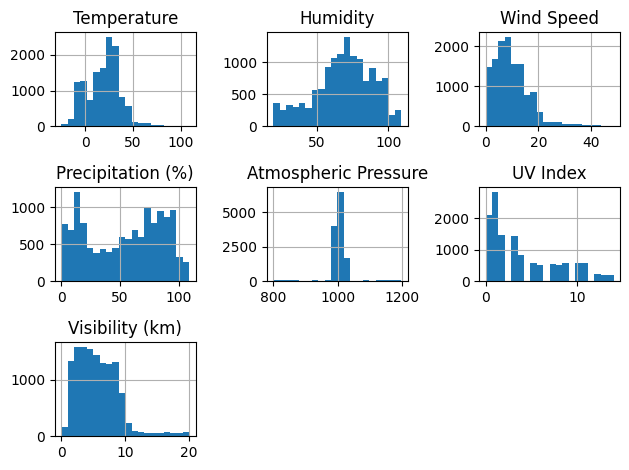

In [38]:
# Histograms for numeric features
data[numeric_features].hist(bins=20)
plt.tight_layout()
plt.show()

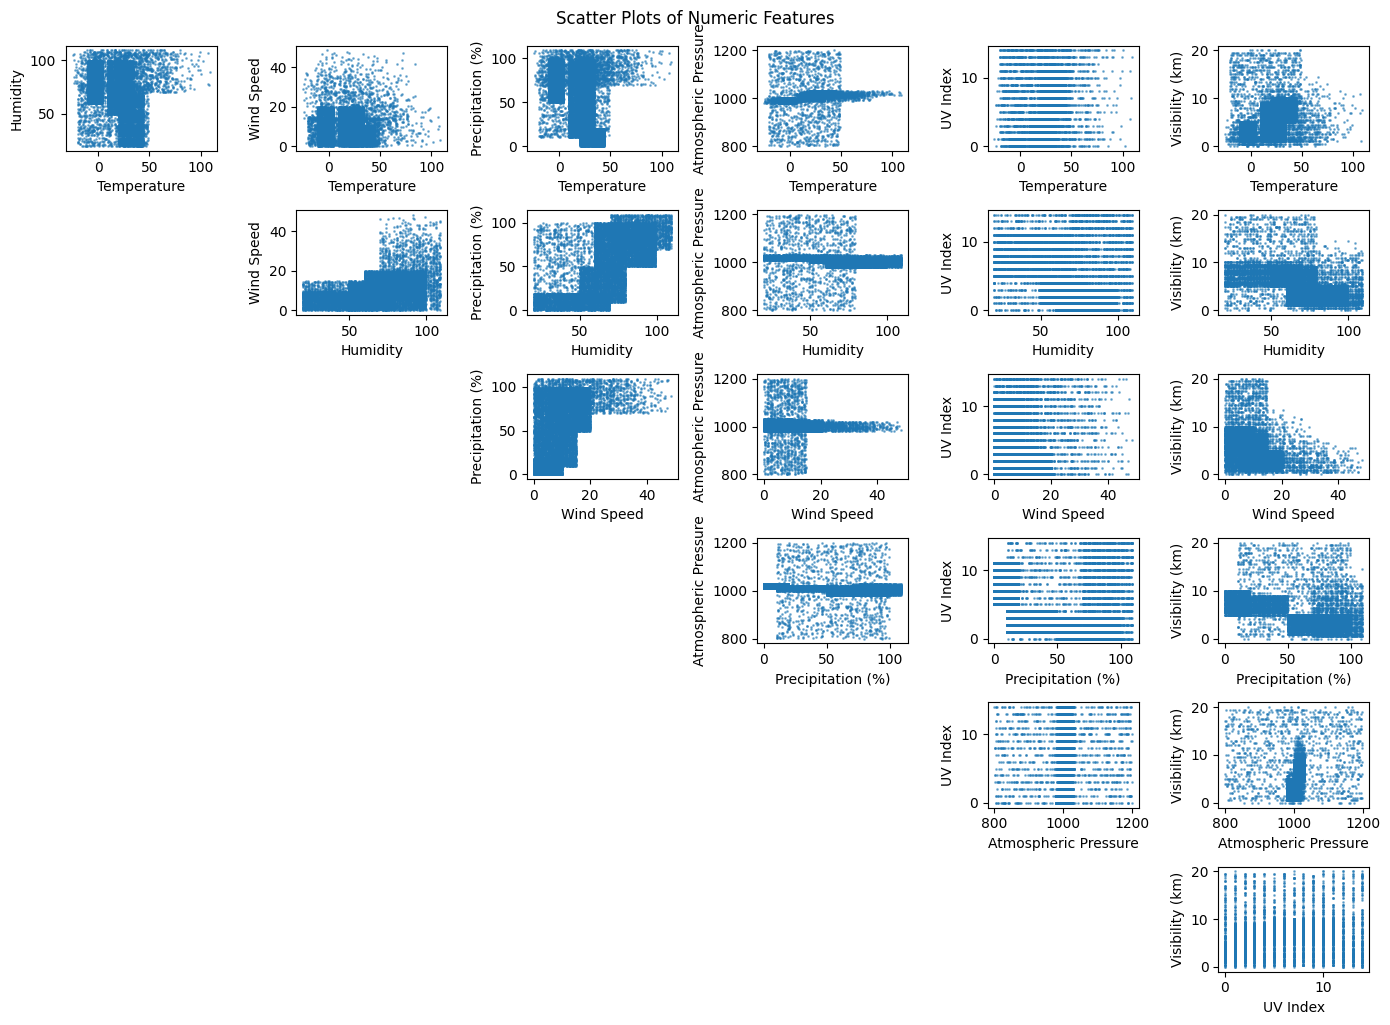

In [39]:
# Plot scatter plots for each pair of features
plt.figure(figsize=(14, 10))
for i in range(len(numeric_features)):
    for j in range(i + 1, len(numeric_features)):
        plt.subplot(len(numeric_features) - 1, len(numeric_features) - 1, i * (len(numeric_features) - 1) + j)
        plt.scatter(data[numeric_features[i]], data[numeric_features[j]], alpha=0.5, s=1)
        plt.xlabel(numeric_features[i])
        plt.ylabel(numeric_features[j])

plt.tight_layout()  # Adjust layout
plt.suptitle('Scatter Plots of Numeric Features', y=1.02)  # Title above all plots
plt.show()

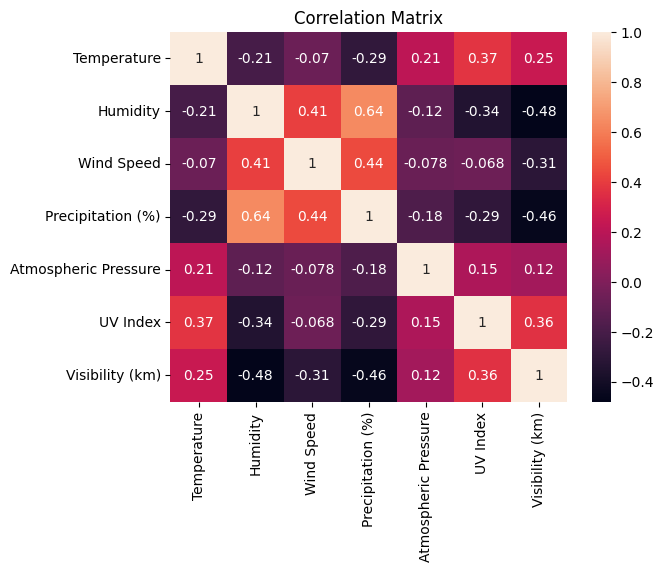

In [40]:
# correlation matrix
correlation_matrix = data[numeric_features].corr()

# Heatmap
sns.heatmap(correlation_matrix, annot=True)
plt.title('Correlation Matrix')
plt.show()

We can see that precipitation and humidity have highest coorelation \
And Visibility and Humidity have lowest coorelation

# **3. Machine Learning Models**

## 1. Logistic Regression

It is a simple and highlt interpretable model

In [41]:
from sklearn.linear_model import LogisticRegression

# Train Logistic Regression
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
y_pred_logistic = logistic_model.predict(X_test)

# Evaluate Logistic Regression
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic, average='weighted')
recall_logistic = recall_score(y_test, y_pred_logistic, average='weighted')
f1_logistic = f1_score(y_test, y_pred_logistic, average='weighted')

print(f'Accuracy: {accuracy_logistic:.4f}, Precision: {precision_logistic:.4f}, Recall: {recall_logistic:.4f}, F1 Score: {f1_logistic:.4f}')

Accuracy: 0.8712, Precision: 0.8720, Recall: 0.8712, F1 Score: 0.8711


## 2. Decision Tree Classifier

It camptures non-linear interactions between features

In [42]:
from sklearn.tree import DecisionTreeClassifier

# Train Decision Tree
decision_tree_model = DecisionTreeClassifier()
decision_tree_model.fit(X_train, y_train)
y_pred_tree = decision_tree_model.predict(X_test)

# Evaluate Decision Tree
accuracy_tree = accuracy_score(y_test, y_pred_tree)
precision_tree = precision_score(y_test, y_pred_tree, average='weighted')
recall_tree = recall_score(y_test, y_pred_tree, average='weighted')
f1_tree = f1_score(y_test, y_pred_tree, average='weighted')

print(f'Accuracy: {accuracy_tree:.4f}, Precision: {precision_tree:.4f}, Recall: {recall_tree:.4f}, F1 Score: {f1_tree:.4f}')

Accuracy: 0.9083, Precision: 0.9084, Recall: 0.9083, F1 Score: 0.9083


## 3. Random Forest

It creates multiple decision trees and aggregates. Usually gives hugh accuracy

In [43]:
from sklearn.ensemble import RandomForestClassifier

# Train Random Forest
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_pred_forest = random_forest_model.predict(X_test)

# Evaluate Random Forest
accuracy_forest = accuracy_score(y_test, y_pred_forest)
precision_forest = precision_score(y_test, y_pred_forest, average='weighted')
recall_forest = recall_score(y_test, y_pred_forest, average='weighted')
f1_forest = f1_score(y_test, y_pred_forest, average='weighted')

print(f'Accuracy: {accuracy_forest:.4f}, Precision: {precision_forest:.4f}, Recall: {recall_forest:.4f}, F1 Score: {f1_forest:.4f}')


Accuracy: 0.9140, Precision: 0.9146, Recall: 0.9140, F1 Score: 0.9141


## 4. XGBoost

This is an advanxed version of gradient boosting \
Ususing gradient boosting to correct the errors of previous models \
Usually used for complez datasets \
\
instead of one-hot encoder i used label encoder because it takes in numeric y vales so i adjusted so

In [47]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Convert target variable to numeric labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Train XGBoost
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss')
xgb_model.fit(X_train, y_train_encoded)
y_pred_xgb_encoded = xgb_model.predict(X_test)

# Convert predictions back to original labels
y_pred_xgb = label_encoder.inverse_transform(y_pred_xgb_encoded)

# Evaluate XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb, average='weighted')
recall_xgb = recall_score(y_test, y_pred_xgb, average='weighted')
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

print(f'XGBoost - Accuracy: {accuracy_xgb:.4f}, Precision: {precision_xgb:.4f}, Recall: {recall_xgb:.4f}, F1 Score: {f1_xgb:.4f}')


XGBoost - Accuracy: 0.9140, Precision: 0.9145, Recall: 0.9140, F1 Score: 0.9141


# **4. Model Evaluation and Comparison**

In [58]:
# Results summary
results = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost'],
    'Accuracy': [accuracy_logistic, accuracy_tree, accuracy_forest, accuracy_xgb],
    'Precision': [precision_logistic, precision_tree, precision_forest, precision_xgb],
    'Recall': [recall_logistic, recall_tree, recall_forest, recall_xgb],
    'F1 Score': [f1_logistic, f1_tree, f1_forest, f1_xgb]
}

result = pd.DataFrame(results)
result

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.871212,0.872047,0.871212,0.871074
1,Decision Tree,0.908333,0.908415,0.908333,0.908334
2,Random Forest,0.914015,0.914568,0.914015,0.914123
3,XGBoost,0.914015,0.914500,0.914015,0.914086


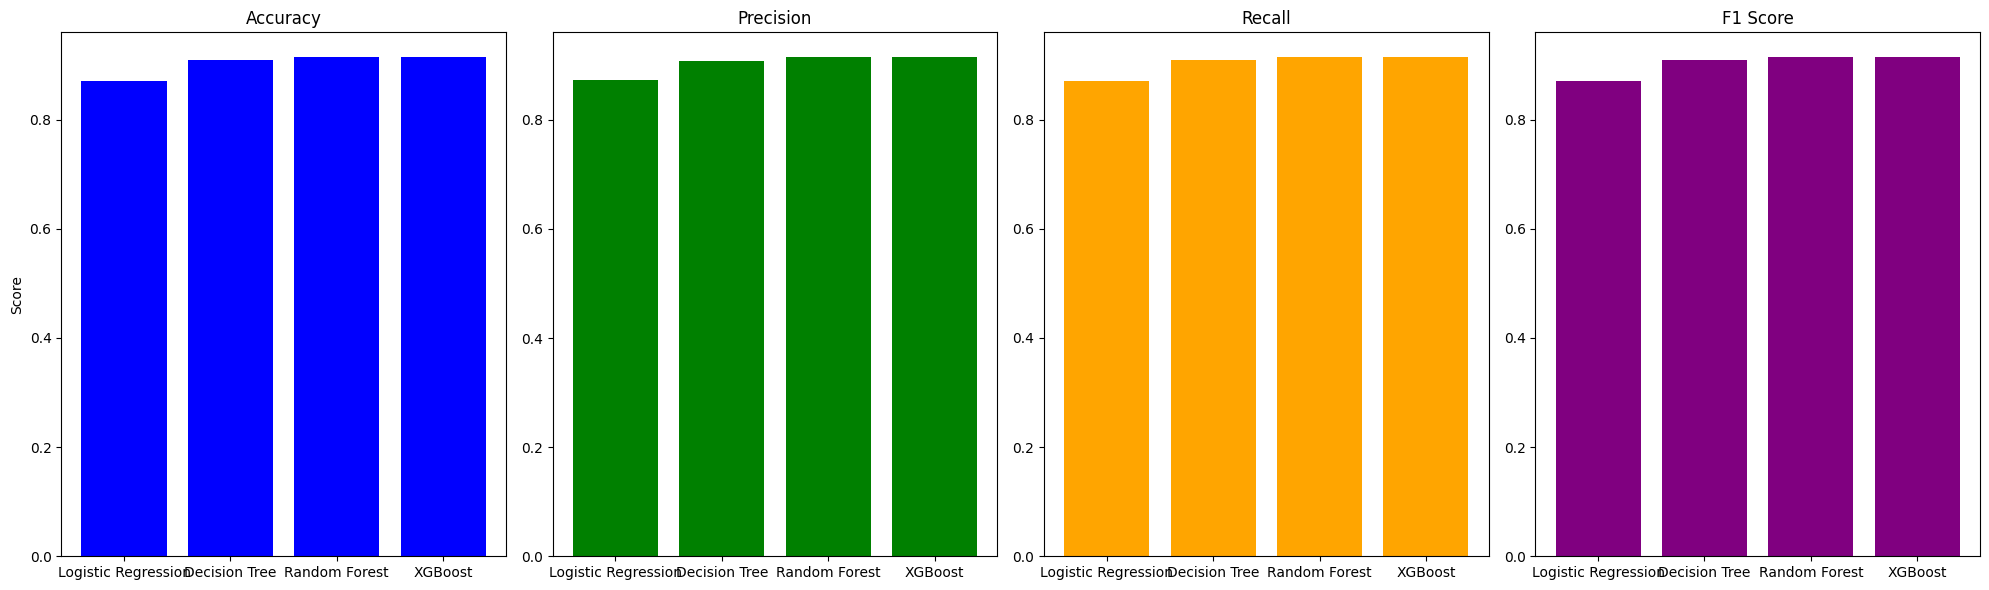

In [59]:
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracies = [0.871212, 0.908333, 0.914015, 0.914015]
precisions = [0.872047, 0.908415, 0.914568, 0.914500]
recalls = [0.871212, 0.908333, 0.914015, 0.914015]
f1_scores = [0.871074, 0.908334, 0.914123, 0.914086]

fig, ax = plt.subplots(1, 4, figsize=(20, 6))

# Accuracy
ax[0].bar(models, accuracies, color='blue')
ax[0].set_title('Accuracy')
ax[0].set_ylabel('Score')

# Precision
ax[1].bar(models, precisions, color='green')
ax[1].set_title('Precision')

# Recall
ax[2].bar(models, recalls, color='orange')
ax[2].set_title('Recall')

# F1 Score
ax[3].bar(models, f1_scores, color='purple')
ax[3].set_title('F1 Score')

plt.tight_layout()
plt.show()

Looking at the evaluation Matrices we can see that logistic regression performed the worst while Random Forest and XGBoost almost performed similar \
Linear regression can only capture linear relationship between features and can't capture non-linear relationships, meanwhile RF and XGB both performed best because they use ensemble learning techniques.